In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()
import alpaca_trade_api as tradeapi

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bfode\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Goldman Sachs news articles
# YOUR CODE HERE!
Goldman_Sachs = newsapi.get_everything(q="Goldman Sachs Group Inc and inflation",language="en")
Goldman_Sachs["totalResults"]


# Print total articles
print(f"Total Goldman_Sachs news articles: {Goldman_Sachs['totalResults']}")

Goldman_Sachs["articles"][4]

Total Goldman_Sachs news articles: 145


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'David Randall',
 'title': 'Wall St Week Ahead Fed shift causes rally in value stocks to wobble - Reuters',
 'description': "The Federal Reserve's hawkish shift is forcing investors to reevaluate the rally in so-called value stocks, which have taken a hit in recent days after ripping higher for most of the year.",
 'url': 'https://www.reuters.com/business/wall-st-week-ahead-fed-shift-causes-rally-value-stocks-wobble-2021-06-18/',
 'urlToImage': 'https://www.reuters.com/resizer/zV9zEPjdqPRY6K7IgPjn3x76O2Q=/800x419/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/4YCOPQNTVVOX5BRJRKVR6WGUJM.jpg',
 'publishedAt': '2021-06-18T19:33:00Z',
 'content': 'A Wall Street sign outside the New York Stock Exchange in the Manhattan borough of New York City, New York, U.S., April 16, 2021. REUTERS/Carlo AllegriNEW YORK, June 17 (Reuters) - The Federal Reserv… [+4350 chars]'}

In [78]:
Goldman_Sachs = pd.DataFrame(Goldman_Sachs)
Goldman_Sachs.to_csv('../data/Goldman_Sachs.csv')

In [7]:
# Create the  sentiment scores DataFrame
# YOUR CODE HERE!
Goldman_Sachs_sentiments = []

for article in Goldman_Sachs["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Goldman_Sachs_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            "date": date
            
        })
        
    except AttributeError:
        pass
    

Goldman_Sachs_df = pd.DataFrame(Goldman_Sachs_sentiments)
Goldman_Sachs_df


,compound,positive,negative,neutral,text,date
0,0.0000,0.000,0.000,1.000,A Goldman Sachs sign is seen above the floor o...,2021-06-22
1,0.0000,0.000,0.000,1.000,People are seen on Wall Street outside the New...,2021-06-21
2,0.0000,0.000,0.000,1.000,A street sign for Wall Street is seen outside ...,2021-06-29
3,0.2023,0.055,0.000,0.945,A Wall Street sign is pictured outside the New...,2021-07-02
4,0.0000,0.000,0.000,1.000,A Wall Street sign outside the New York Stock ...,2021-06-18
5,0.3400,0.068,0.000,0.932,NEW YORK (Reuters) - The Federal Reserves hawk...,2021-06-18
6,0.5023,0.087,0.000,0.913,The Federal Reserve made some big headlines th...,2021-06-18
7,0.4588,0.109,0.057,0.833,People were already worried about equities six...,2021-06-25
8,0.0258,0.140,0.137,0.723,Everything might be securities fraud\r\nWe \r\...,2021-06-22
9,-0.2263,0.066,0.090,0.844,China has stepped up its campaign to rein in c...,2021-06-16


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
Goldman_Sachs_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.006205,0.053150,0.048150,0.898550
std,0.327179,0.049286,0.053475,0.082063
min,-0.718400,0.000000,0.000000,0.723000
25%,-0.113125,0.000000,0.000000,0.832750
50%,0.000000,0.060500,0.028500,0.915000
75%,0.225725,0.089000,0.090500,0.958750
max,0.502300,0.140000,0.146000,1.000000


In [9]:
### Natural Language Processing

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stopWords = set(stopwords.words('english'))
print(len(stopWords))
print(stopWords)

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

179
{'i', 'you', 'your', 'here', 'these', 'to', 'this', 'mightn', 'had', 'couldn', "shouldn't", 'own', 'ourselves', 'further', 'o', 'ours', 'yourself', 'as', 'our', 'during', 'themselves', 'so', 'hadn', 'should', 'it', "hadn't", 'from', "aren't", 'have', 'some', 'against', "that'll", 'haven', 'in', 'off', "won't", 'now', 'was', 'at', 'ain', 'will', 'himself', 'wouldn', 'and', 'my', "it's", 'whom', 'having', "mightn't", 'that', 'by', 'weren', 'itself', 'yourselves', 'who', 'its', 'only', 'did', 'shouldn', 'until', 'were', 'an', 'which', 'than', 'just', "needn't", 'while', "weren't", 'herself', 'they', 'the', 'we', 'nor', "you're", 'she', 'ma', 'not', 'why', 'can', 'such', 'few', 'them', 'all', "should've", 'm', 'under', "shan't", 'if', 'doesn', "couldn't", 'again', 'there', 'me', 'each', 'isn', 'both', 'hers', 'hasn', 'a', 'has', 'does', 'doing', 's', 'over', "doesn't", 'up', "wasn't", 'very', 'down', 'no', 'same', 'don', 'wasn', 'because', 'him', 'how', 'his', 'her', 'do', 'about', 'sh

In [84]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in stopWords]
    
    return output
    

In [85]:
# Create a new tokens column for WallStreet_Bets
# YOUR CODE HERE!
Goldman_Sachs_df['tokens'] = WallStreet_Bets_df.text.apply(tokenizer)
Goldman_Sachs_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.0000,0.000,0.0,1.000,A Goldman Sachs sign is seen above the floor o...,"[goldman, sachs, sign, seen, floor, new, york,..."
1,0.0000,0.000,0.0,1.000,People are seen on Wall Street outside the New...,"[people, seen, wall, street, outside, new, yor..."
2,0.0000,0.000,0.0,1.000,A street sign for Wall Street is seen outside ...,"[street, sign, wall, street, seen, outside, ne..."
3,0.2023,0.055,0.0,0.945,A Wall Street sign is pictured outside the New...,"[wall, street, sign, pictured, outside, new, y..."
4,0.0000,0.000,0.0,1.000,A Wall Street sign outside the New York Stock ...,"[wall, street, sign, outside, new, york, stock..."


In [14]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [15]:
# Format current date as ISO format
# YOUR CODE HERE!

start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
#today = pd.Timestamp("2021-04-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["WFC", "GS","MS"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.tail()

GS                                         MS  \
                             open      high      low   close   volume   open   
2020-08-03 00:00:00-04:00  198.49  199.8800  196.530  199.39  4222375  49.22   
2020-08-04 00:00:00-04:00  199.35  201.7200  198.475  201.65  3688146  49.50   
2020-08-05 00:00:00-04:00  203.17  204.8075  203.010  204.48  4088479  49.59   
2020-08-06 00:00:00-04:00  205.00  206.2900  203.830  204.25  3316362  49.83   
2020-08-07 00:00:00-04:00  203.48  208.8000  202.450  208.27  5694814  49.21   

                                                             WFC         \
                             high    low  close    volume   open   high   
2020-08-03 00:00:00-04:00  49.905  48.72  49.47  11369869  24.25  24.50   
2020-08-04 00:00:00-04:00  49.770  49.08  49.26  11431220  24.20  24.29   
2020-08-05 00:00:00-04:00  49.960  49.44  49.78  11894233  24.40  24.75   
2020-08-06 00:00:00-04:00  49.980  49.24  49.46  10118777  24.20  24.50   
2020-08-07 00:00:00-04:00  50.470  49.08  50.35  11121376  24.13  25.22   

                                                   
                             low  close    volume  
2020-08-03 00:00:00-04:00  23.90  24.30  52779706  
2020-08-04 00:00:00-04:00  24.03  24.22  53890753  
2020-08-05 00:00:00-04:00  24.34  24.39  60841700  
2020-08-06 00:00:00-04:00  24.12  24.25  75782256  
2020-08-07 00:00:00-04:00  24.00  25.07  77686591

In [19]:
#Saving Raw data to Raw Data Folder
df_portfolio.to_csv('../data/stock_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/stock_data.csv'

In [88]:
# Format current date as ISO format
# YOUR CODE HERE!

start_date = pd.Timestamp('2021-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-30', tz='America/New_York').isoformat()

In [89]:
# Get 5 years' worth of historical data for SPY and AGG
#Wells Fargo Co. (WFC), Goldman Sachs Group Inc. (GS), and Morgan Stanley (MS).

tickers = ["WFC", "GS","MS"]

# Set timeframe to '1D' for Alpaca API
timeframe = "15Min"

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

GS                                       MS  \
                              open    high     low    close   volume   open   
2021-06-01 09:30:00-04:00  377.570  380.03  377.00  378.195  25900.0  92.41   
2021-06-01 09:45:00-04:00  377.350  379.09  377.33  378.720   7691.0  92.19   
2021-06-01 10:00:00-04:00  378.425  379.80  378.42  378.610   6132.0  92.70   
2021-06-01 10:15:00-04:00  379.020  379.68  377.73  378.440  13198.0  92.76   
2021-06-01 10:30:00-04:00  378.990  381.87  378.99  381.650   9437.0  92.59   

                                                               WFC          \
                             high     low   close   volume    open    high   
2021-06-01 09:30:00-04:00  92.790  91.895  92.120  64720.0  47.150  47.365   
2021-06-01 09:45:00-04:00  92.750  92.100  92.680  17071.0  46.960  47.090   
2021-06-01 10:00:00-04:00  93.080  92.690  92.825  31710.0  47.055  47.290   
2021-06-01 10:15:00-04:00  92.765  92.390  92.570  18284.0  47.280  47.310   
2021-06-01 10:30:00-04:00  93.300  92.590  93.240  18097.0  47.215  47.400   

                                                    
                              low   close   volume  
2021-06-01 09:30:00-04:00  46.795  46.965  69801.0  
2021-06-01 09:45:00-04:00  46.895  47.055  35782.0  
2021-06-01 10:00:00-04:00  47.055  47.290  27951.0  
2021-06-01 10:15:00-04:00  47.145  47.200  17079.0  
2021-06-01 10:30:00-04:00  47.215  47.390  31670.0

In [90]:
df_stock_data.isnull().sum()

GS   open      7
     high      7
     low       7
     close     7
     volume    7
MS   open      4
     high      4
     low       4
     close     4
     volume    4
WFC  open      3
     high      3
     low       3
     close     3
     volume    3
dtype: int64

In [91]:
df_stock_data.dropna(inplace=True)
df_stock_data

GS                                      \
                              open     high      low    close   volume   
2021-06-01 09:30:00-04:00  377.570  380.030  377.000  378.195  25900.0   
2021-06-01 09:45:00-04:00  377.350  379.090  377.330  378.720   7691.0   
2021-06-01 10:00:00-04:00  378.425  379.800  378.420  378.610   6132.0   
2021-06-01 10:15:00-04:00  379.020  379.680  377.730  378.440  13198.0   
2021-06-01 10:30:00-04:00  378.990  381.870  378.990  381.650   9437.0   
...                            ...      ...      ...      ...      ...   
2021-06-29 14:45:00-04:00  371.160  371.610  370.940  371.530   1661.0   
2021-06-29 15:00:00-04:00  371.525  373.185  371.525  373.175   1393.0   
2021-06-29 15:15:00-04:00  372.920  373.280  372.810  372.970   4079.0   
2021-06-29 15:30:00-04:00  372.830  372.850  372.420  372.580   3678.0   
2021-06-29 15:45:00-04:00  372.850  372.970  372.460  372.595   6301.0   

                               MS                                      WFC  \
                             open    high     low   close   volume    open   
2021-06-01 09:30:00-04:00  92.410  92.790  91.895  92.120  64720.0  47.150   
2021-06-01 09:45:00-04:00  92.190  92.750  92.100  92.680  17071.0  46.960   
2021-06-01 10:00:00-04:00  92.700  93.080  92.690  92.825  31710.0  47.055   
2021-06-01 10:15:00-04:00  92.760  92.765  92.390  92.570  18284.0  47.280   
2021-06-01 10:30:00-04:00  92.590  93.300  92.590  93.240  18097.0  47.215   
...                           ...     ...     ...     ...      ...     ...   
2021-06-29 14:45:00-04:00  90.430  90.500  90.385  90.490   4266.0  44.690   
2021-06-29 15:00:00-04:00  90.460  90.755  90.445  90.740   5240.0  44.620   
2021-06-29 15:15:00-04:00  90.725  90.770  90.690  90.730   3739.0  44.810   
2021-06-29 15:30:00-04:00  90.660  90.660  90.390  90.435  18152.0  44.890   
2021-06-29 15:45:00-04:00  90.435  90.680  90.435  90.620  37312.0  44.905   

                                                             
                             high     low   close    volume  
2021-06-01 09:30:00-04:00  47.365  46.795  46.965   69801.0  
2021-06-01 09:45:00-04:00  47.090  46.895  47.055   35782.0  
2021-06-01 10:00:00-04:00  47.290  47.055  47.290   27951.0  
2021-06-01 10:15:00-04:00  47.310  47.145  47.200   17079.0  
2021-06-01 10:30:00-04:00  47.400  47.215  47.390   31670.0  
...                           ...     ...     ...       ...  
2021-06-29 14:45:00-04:00  44.710  44.615  44.630   43061.0  
2021-06-29 15:00:00-04:00  44.830  44.605  44.820   55501.0  
2021-06-29 15:15:00-04:00  44.905  44.730  44.905   29905.0  
2021-06-29 15:30:00-04:00  44.910  44.855  44.885   29078.0  
2021-06-29 15:45:00-04:00  44.915  44.730  44.770  132767.0  

[546 rows x 15 columns]

In [102]:
closing_price_gs = pd.DataFrame(df_stock_data["GS"]["close"])
closing_price_ms = pd.DataFrame(df_stock_data["MS"]["close"])
closing_price_wfc = pd.DataFrame(df_stock_data["WFC"]["close"])
all_closing_price = pd.concat([closing_price_gs, closing_price_ms, closing_price_wfc], axis="columns", join="inner")
all_closing_price.index = all_closing_price.index.date
all_closing_price.columns = ["GS","MS","WFC"]
all_closing_price

,GS,MS,WFC
2021-06-01,378.195,92.120,46.965
2021-06-01,378.720,92.680,47.055
2021-06-01,378.610,92.825,47.290
2021-06-01,378.440,92.570,47.200
2021-06-01,381.650,93.240,47.390
...,...,...,...
2021-06-29,371.530,90.490,44.630
2021-06-29,373.175,90.740,44.820
2021-06-29,372.970,90.730,44.905
2021-06-29,372.580,90.435,44.885


In [93]:
all_closing_price_returns = all_closing_price.pct_change().dropna()
all_closing_price_returns.head(10)

,GS,MS,WFC
2021-06-01,0.001388,0.006079,0.001916
2021-06-01,-0.000290,0.001565,0.004994
2021-06-01,-0.000449,-0.002747,-0.001903
2021-06-01,0.008482,0.007238,0.004025
2021-06-01,-0.003354,-0.002574,-0.002110
2021-06-01,0.002945,0.001075,0.001903
2021-06-01,0.001258,-0.000107,-0.000844
2021-06-01,0.003011,-0.001396,-0.000211
2021-06-01,-0.000235,-0.001452,-0.001479
2021-06-01,0.000131,-0.000916,-0.000317


In [94]:
all_closing_price = all_closing_price.pct_change().dropna()
all_closing_price

,GS,MS,WFC
2021-06-01,0.001388,0.006079,0.001916
2021-06-01,-0.000290,0.001565,0.004994
2021-06-01,-0.000449,-0.002747,-0.001903
2021-06-01,0.008482,0.007238,0.004025
2021-06-01,-0.003354,-0.002574,-0.002110
...,...,...,...
2021-06-29,0.000323,0.000553,-0.001007
2021-06-29,0.004428,0.002763,0.004257
2021-06-29,-0.000549,-0.000110,0.001896
2021-06-29,-0.001046,-0.003251,-0.000445


In [95]:
closing_price_gs = pd.DataFrame(df_stock_data["GS"])
closing_price_gs.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [96]:
closing_price_gs = pd.DataFrame(df_stock_data["GS"]["close"])
closing_price_gs.columns=["GS"]
closing_price_gs

,GS
2021-06-01 09:30:00-04:00,378.195
2021-06-01 09:45:00-04:00,378.720
2021-06-01 10:00:00-04:00,378.610
2021-06-01 10:15:00-04:00,378.440
2021-06-01 10:30:00-04:00,381.650
...,...
2021-06-29 14:45:00-04:00,371.530
2021-06-29 15:00:00-04:00,373.175
2021-06-29 15:15:00-04:00,372.970
2021-06-29 15:30:00-04:00,372.580


In [97]:
closing_price_gs["Returns"] = closing_price_gs.pct_change()* 100
closing_price_gs['Lagged_Return'] = closing_price_gs['Returns'].shift()
closing_price_gs = closing_price_gs.dropna()
closing_price_gs.tail()

,GS,Returns,Lagged_Return
2021-06-29 14:45:00-04:00,371.530,0.032309,-0.244413
2021-06-29 15:00:00-04:00,373.175,0.442764,0.032309
2021-06-29 15:15:00-04:00,372.970,-0.054934,0.442764
2021-06-29 15:30:00-04:00,372.580,-0.104566,-0.054934
2021-06-29 15:45:00-04:00,372.595,0.004026,-0.104566


In [110]:
gs_df = pd.DataFrame(df_stock_data["GS"])
gs_df

,open,high,low,close,volume
2021-06-01 09:30:00-04:00,377.570,380.030,377.000,378.195,25900.0
2021-06-01 09:45:00-04:00,377.350,379.090,377.330,378.720,7691.0
2021-06-01 10:00:00-04:00,378.425,379.800,378.420,378.610,6132.0
2021-06-01 10:15:00-04:00,379.020,379.680,377.730,378.440,13198.0
2021-06-01 10:30:00-04:00,378.990,381.870,378.990,381.650,9437.0
...,...,...,...,...,...
2021-06-29 14:45:00-04:00,371.160,371.610,370.940,371.530,1661.0
2021-06-29 15:00:00-04:00,371.525,373.185,371.525,373.175,1393.0
2021-06-29 15:15:00-04:00,372.920,373.280,372.810,372.970,4079.0
2021-06-29 15:30:00-04:00,372.830,372.850,372.420,372.580,3678.0


In [112]:
gs_df['Return'] = gs_df.close.pct_change() * 100
gs_df['Lagged_Return'] = gs_df['Return'].shift()
gs_df = gs_df.dropna()
gs_df.tail()

,open,high,low,close,volume,Return,Lagged_Return
2021-06-29 14:45:00-04:00,371.160,371.610,370.940,371.530,1661.0,0.032309,-0.244413
2021-06-29 15:00:00-04:00,371.525,373.185,371.525,373.175,1393.0,0.442764,0.032309
2021-06-29 15:15:00-04:00,372.920,373.280,372.810,372.970,4079.0,-0.054934,0.442764
2021-06-29 15:30:00-04:00,372.830,372.850,372.420,372.580,3678.0,-0.104566,-0.054934
2021-06-29 15:45:00-04:00,372.850,372.970,372.460,372.595,6301.0,0.004026,-0.104566


In [121]:
train = gs_df[:'2021-06-27']
test = gs_df['2021-06-28':]

In [122]:
X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
y_train = train["Return"]
y_test = test["Return"]

In [124]:
y_test.head()

2021-06-28 09:30:00-04:00   -1.130694
2021-06-28 09:45:00-04:00    0.691112
2021-06-28 10:00:00-04:00   -0.408552
2021-06-28 10:15:00-04:00    0.404759
2021-06-28 10:30:00-04:00   -0.345927
Name: Return, dtype: float64

In [125]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
# YOUR CODE HERE!
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE!
predicted_y_values = model.predict(X_test)

In [127]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!
Results = y_test.to_frame()
Results["Predicted Return"] = predicted_y_values

In [128]:
Results.head(2)

,Return,Predicted Return
2021-06-28 09:30:00-04:00,-1.130694,-0.003921
2021-06-28 09:45:00-04:00,0.691112,0.001773


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C9A1883D0>,
      dtype=object)

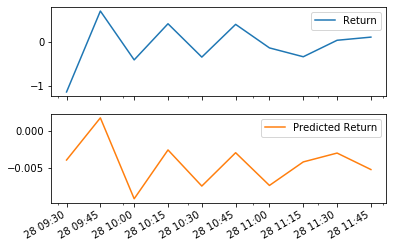

In [132]:
Results[:10].plot(subplots=True)